In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon


plt.style.use('ggplot')

data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [2]:
feat = 'Diversity'

# Extract the relevant population data based on the feature
diversity_data = data[feature_category_dict[feat]]

rows_with_nan = diversity_data.isnull().any(axis=1)

print('Number of rows with NaN values:', rows_with_nan.sum())

# print the rows with NaN values
print('Community Names with NaN values:')
print(data['Community Name'][rows_with_nan])

# print % of columns with NaN values for these rows
print('Percentage of columns with NaN values for these rows:')

for i in range(0, len(rows_with_nan)):
	if rows_with_nan[i]:
		print(diversity_data.iloc[i].isnull().mean()*100)


# print which columns have NaN values
print('Columns with NaN values:')
print(diversity_data.columns[diversity_data.isnull().any()])

# drop any row that has NaN values
for col in diversity_data.columns:
	if diversity_data[col].isnull().any():
		diversity_data = diversity_data.dropna(subset=[col])

diversity_data


Number of rows with NaN values: 6
Community Names with NaN values:
8               Malvern
9     Melbourne Airport
22             Sorrento
26     St Andrews Beach
29        St Kilda West
32            Waterways
Name: Community Name, dtype: object
Percentage of columns with NaN values for these rows:
2.5
20.0
7.5
12.5
2.5
2.5
Columns with NaN values:
Index(['Aboriginal or Torres Strait Islander, %',
       'Poor English proficiency, %', '3rd top language spoken, %',
       '4th top language spoken', '4th top language spoken, persons',
       '4th top language spoken, %', '5th top language spoken',
       '5th top language spoken, persons', '5th top language spoken, %'],
      dtype='object')


,"Aboriginal or Torres Strait Islander, persons","Aboriginal or Torres Strait Islander, %","Born overseas, persons","Born overseas, %","Born in non-English speaking country, persons","Born in non-English speaking country, %","Speaks LOTE at home, persons","Speaks LOTE at home, %","Poor English proficiency, persons","Poor English proficiency, %",...,"2nd top language spoken, %",3rd top language spoken,"3rd top language spoken, persons","3rd top language spoken, %",4th top language spoken,"4th top language spoken, persons","4th top language spoken, %",5th top language spoken,"5th top language spoken, persons","5th top language spoken, %"
0,53,0.420235,3792,30.203106,3003,23.918757,3730,29.598476,795,6.308522,...,3.501512,Greek,366,2.912621,Cantonese,271,2.156613,Arabic,215,1.710966
1,55,0.744048,4207,57.370790,3969,54.125188,5296,71.461341,1606,21.670490,...,7.890826,Somali,235,3.175247,Mandarin,208,2.810431,Punjabi,161,2.175382
2,251,0.797205,10529,33.612131,8924,28.488428,12725,40.481644,1778,5.656296,...,3.674274,Sinhalese,1081,3.435891,Italian,1050,3.337359,Punjabi,1007,3.200687
3,118,0.519755,4925,21.826804,2673,11.846304,2516,11.068098,577,2.538272,...,0.681379,Dutch,147,0.646211,Chin_Haka,142,0.624231,German,139,0.611043
4,60,0.505519,5874,49.632446,5404,45.661174,7772,65.503582,1728,14.563843,...,11.386222,Urdu,773,6.510022,Greek,577,4.859357,Turkish,420,3.537140
5,48,0.415045,6084,52.936570,5206,45.297137,6203,54.033101,1469,12.796167,...,5.016490,Cantonese,405,3.515015,Greek,288,2.499566,Bengali,283,2.456171
6,132,0.720996,7638,41.858936,6878,37.693867,9129,49.651909,1604,8.724029,...,8.184241,Turkish,839,4.562510,Greek,558,3.034423,Punjabi,383,2.082767
7,21,0.108578,5552,28.861049,4258,22.134428,4907,25.436732,583,3.022135,...,5.049459,Cantonese,366,1.895489,Italian,329,1.703869,Indonesian,191,0.989176
10,10,0.089310,3111,27.991722,1894,17.041569,2081,18.595300,264,2.359039,...,1.814768,Italian,196,1.752190,Russian,110,0.983372,Turkish,77,0.688360
11,20,0.393546,1705,34.086365,1274,25.469812,1473,29.191439,201,3.983353,...,3.259141,Mandarin,157,3.120032,Italian,132,2.623211,Arabic,79,1.569952


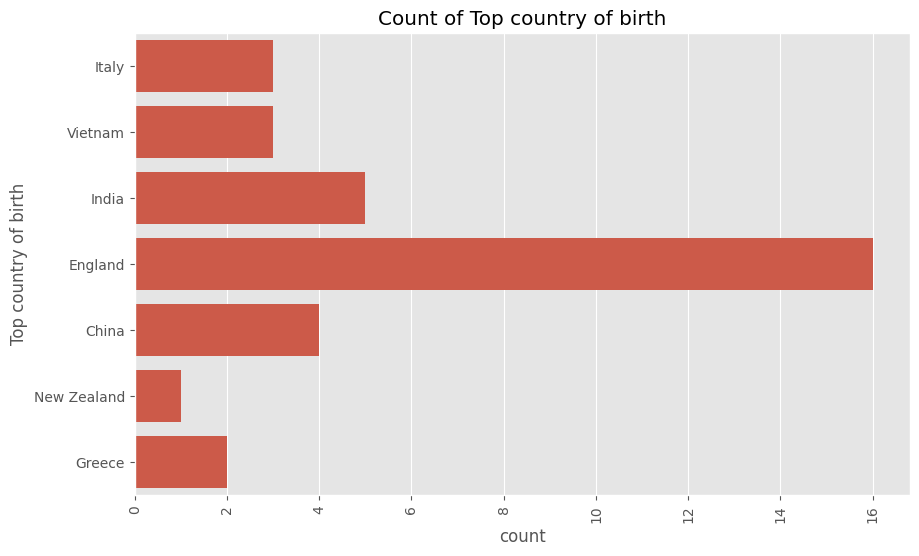

Total number of counts: 34


In [3]:
# do a countplot of 'Top country of birth'
plt.figure(figsize=(10, 6))
sns.countplot(data['Top country of birth'])
plt.xticks(rotation=90)
plt.title('Count of Top country of birth')
plt.show()
# compute total number of the counts
total = data['Top country of birth'].value_counts().sum()
print('Total number of counts:', total)

In [4]:
# Create a copy of the DataFrame slice to avoid SettingWithCopyWarning
diversity_data = diversity_data.copy()
diversity_data['Top country of birth'] = diversity_data['Top country of birth'].astype('category')
diversity_data['Top country of birth'] = diversity_data['Top country of birth'].cat.codes


Moran's I for 'Top country of birth': 0.1765
P-value: 0.0098


c:\Users\subha\miniconda3\Lib\site-packages\esda\moran.py:1084: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


Significant clusters
       Community Name  LISA Cluster
2         Craigieburn           1.0
4             Fawkner           1.0
6             Glenroy           1.0
13        Murrumbeena           4.0
16          Northcote           3.0
18  Pascoe Vale South           1.0
20            Prahran           3.0
23    South Melbourne           3.0
24        South Yarra           3.0
27      St Kilda East           3.0
28           St Kilda           3.0
30             Toorak           3.0
33            Windsor           3.0


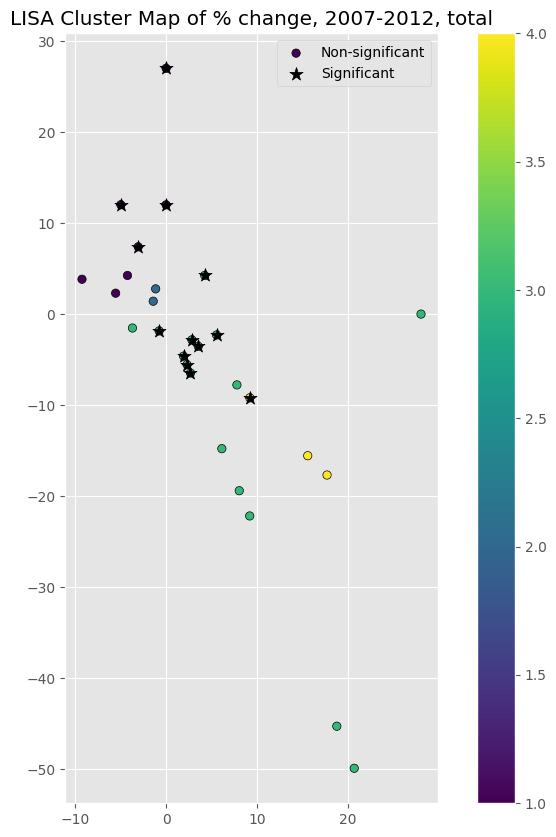

In [5]:
# do a LISA analysis to see if there are any spatial patterns
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from esda import Moran, Moran_Local
import matplotlib.pyplot as plt

np.random.seed(42)

# Data is assumed to be loaded with columns 'cart_x' and 'cart_y'
# GeoDataFrame creation with geometry based on coordinates

# choose the subset of 'data' with common rows as 'diversity_data'

subset_data = data.loc[diversity_data.index]

gdf = gpd.GeoDataFrame(subset_data, geometry=gpd.points_from_xy(subset_data['cart_x'], subset_data['cart_y']))

# Create KNN weights with k=8 and row-standardize
w = weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'  # Row-standardization

# Calculate global Moran's I
moran = Moran(diversity_data['Top country of birth'], w, permutations=9999)
print(f"Moran's I for 'Top country of birth': {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")

# Calculate Local Moran's I (LISA)
lisa = Moran_Local(diversity_data['Top country of birth'], w)

# Plot LISA clusters
fig, ax = plt.subplots(figsize=(10, 10))
# gdf.plot(ax=ax, facecolor='lightgray', edgecolor='black')

# Identify significant clusters and plot them
significant = lisa.p_sim < 0.05
gdf.loc[significant, 'LISA Cluster'] = lisa.q[significant]  # Add cluster information to GeoDataFrame

# print the significant clusters
print('Significant clusters')
print(gdf.loc[significant, ['Community Name', 'LISA Cluster']])


# Plot significant clusters with colors for different cluster types
gdf.assign(cluster=lisa.q).plot(column='cluster', ax=ax, legend=True, cmap='viridis', edgecolor='black')
# highlight the significant suburbs
gdf.loc[significant].plot(ax=ax, marker='*', color='black', markersize=100)
plt.title("LISA Cluster Map of % change, 2007-2012, total")
plt.legend(['Non-significant', 'Significant'])
plt.show()




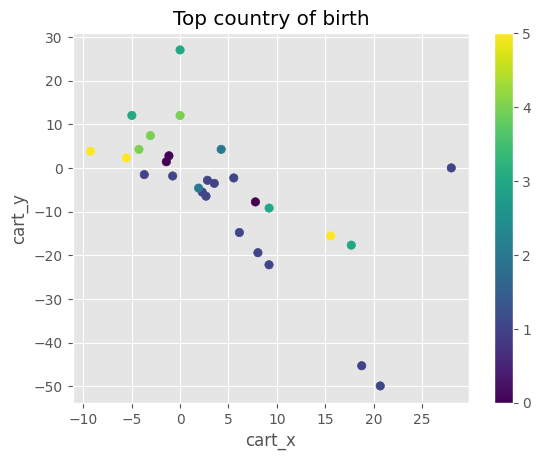

In [7]:
plt.scatter(subset_data['cart_x'], subset_data['cart_y'], c=diversity_data['Top country of birth'], cmap='viridis')
plt.colorbar()
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.title('Top country of birth')
plt.show()

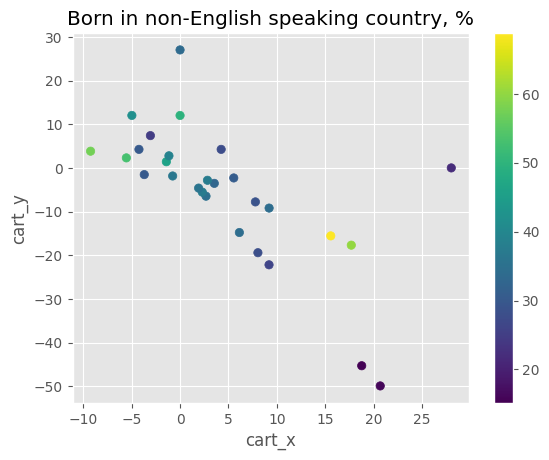

Moran's I for 'Born overseas, %': -0.0368
P-value: 0.4279


In [9]:
plt.scatter(subset_data['cart_x'], subset_data['cart_y'], c=diversity_data['Born overseas, %'], cmap='viridis')
plt.colorbar()
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.title('Born in non-English speaking country, %')
plt.show()

moran=Moran(diversity_data['Born overseas, %'], w, permutations=9999)
print(f"Moran's I for 'Born overseas, %': {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")

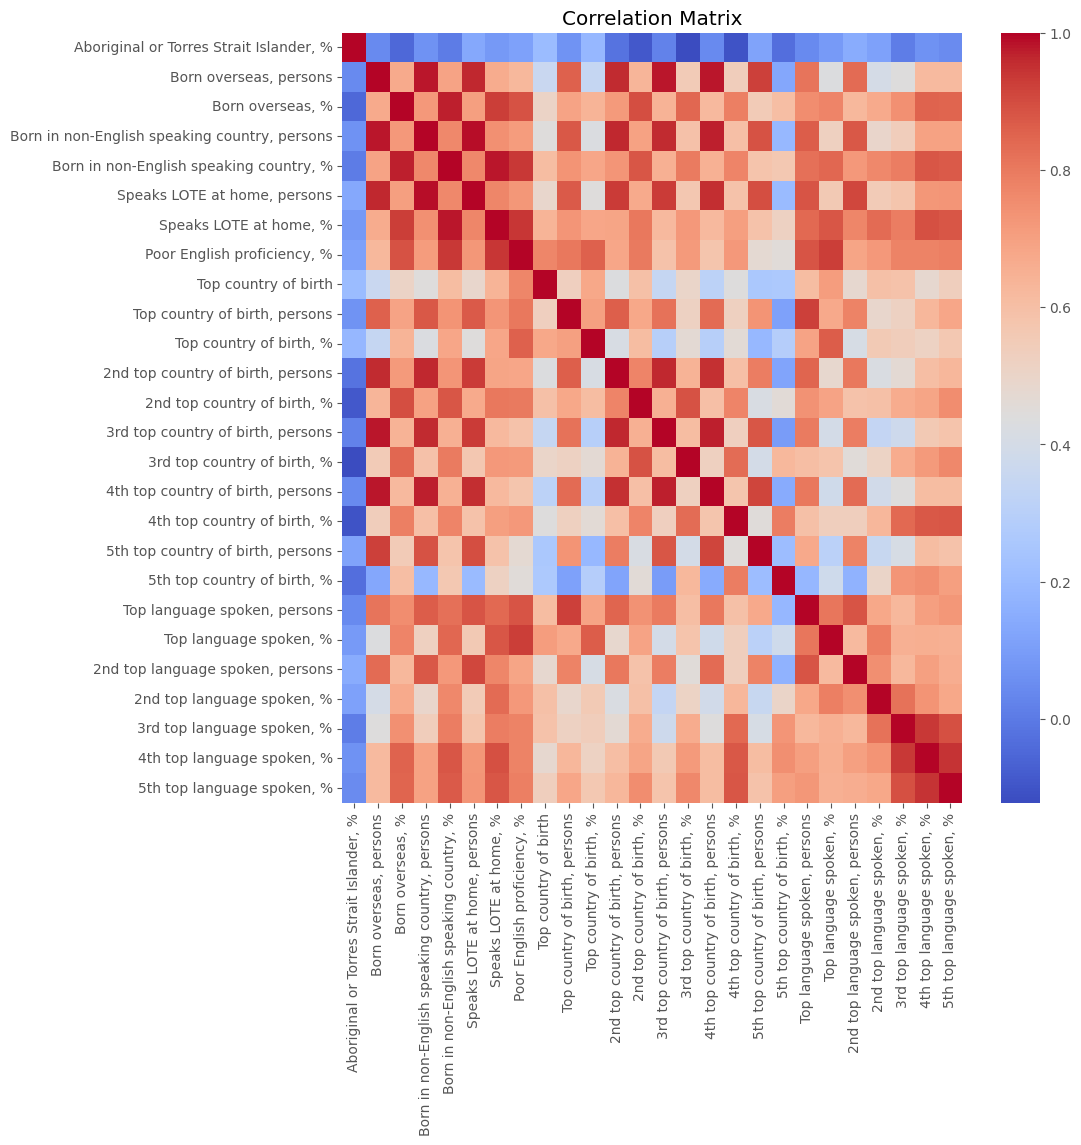

In [ ]:
# do a correlation analysis for numerical features
# Extract the numerical columns
numerical_columns = diversity_data.select_dtypes(include=np.number).columns

# Compute the correlation matrix
corr = diversity_data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Moran's I for 'Aboriginal or Torres Strait Islander, %': 0.1184
P-value: 0.0309


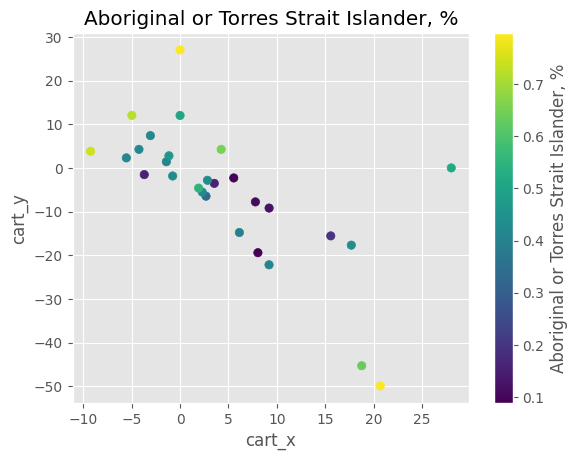

In [10]:
import matplotlib.pyplot as plt
from esda.moran import Moran

def plot_and_compute_morans_i(data, diversity_data, column_name, w):
    """
    Plots a scatter plot for specified data column and computes Moran's I.

    Parameters:
    - data: DataFrame containing 'cart_x' and 'cart_y' columns for coordinates.
    - diversity_data: DataFrame containing the column to be analyzed for Moran's I.
    - column_name: String name of the column in diversity_data for percentage data.
    - w: Spatial weights matrix for computing Moran's I.

    Returns:
    - Moran's I statistic and p-value as printed output.
    """
    
	# Moran's I calculation
    moran = Moran(diversity_data[column_name], w, permutations=9999)
    print(f"Moran's I for '{column_name}': {moran.I:.4f}")
    print(f"P-value: {moran.p_sim:.4f}")
    
    # Scatter plot
    plt.scatter(subset_data['cart_x'], subset_data['cart_y'], c=diversity_data[column_name], cmap='viridis')
    plt.colorbar(label=column_name)
    plt.xlabel('cart_x')
    plt.ylabel('cart_y')
    plt.title(f'{column_name}')
    plt.show()



# Example usage:
# plot_and_compute_morans_i(data, diversity_data, 'Born overseas, %', w)


plot_and_compute_morans_i(data, diversity_data, 'Aboriginal or Torres Strait Islander, %', w)

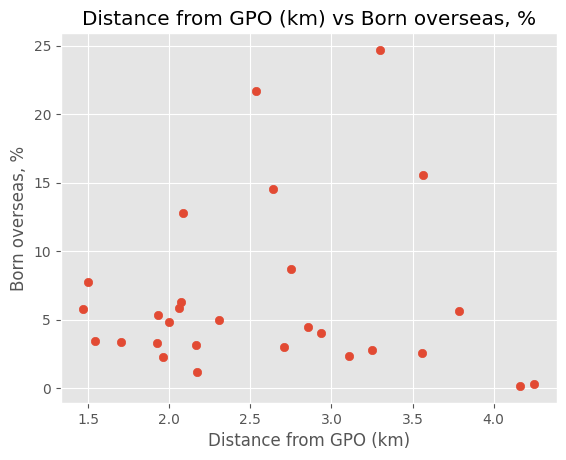

In [16]:
# plot Distance from GPO (km) vs Born overseas, %
plt.scatter(subset_data['Distance to GPO (km)'], diversity_data['Poor English proficiency, %'])
plt.xlabel('Distance from GPO (km)')
plt.ylabel('Born overseas, %')
plt.title('Distance from GPO (km) vs Born overseas, %')
plt.show()


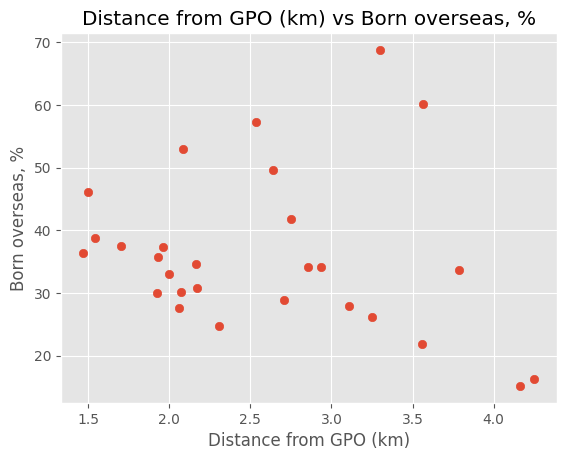

In [14]:
# log transform the 'Distance to GPO (km)' column
subset_data['Distance to GPO (km)'] = np.log1p(subset_data['Distance to GPO (km)'])

# plot the log transformed Distance from GPO (km) vs Born overseas, %
plt.scatter(subset_data['Distance to GPO (km)'], diversity_data['Born overseas, %'])
plt.xlabel('Distance from GPO (km)')
plt.ylabel('Born overseas, %')
plt.title('Distance from GPO (km) vs Born overseas, %')
plt.show()

In [15]:
# try to fit a Spatial Durbin Model
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from esda import Moran, Moran_Local
import matplotlib.pyplot as plt
from pysal.model import spreg

np.random.seed(42)

# Data is assumed to be loaded with columns 'cart_x' and 'cart_y'
# GeoDataFrame creation with geometry based on coordinates

# choose the subset of 'data' with common rows as 'diversity_data'
w=weights.KNN.from_dataframe(gdf, k=8)
w.transform='R'

y=diversity_data['Born overseas, %']
X=subset_data[['Distance to GPO (km)']]

model=spreg.ML_Lag(y.values[:, None], X.values, w=w, name_y='Born overseas, %', name_x=['Distance to GPO (km)'], name_w='knn', name_ds='data', slx_lags=1)
print(model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :        data
Weights matrix      :         knn
Dependent Variable  :Born overseas, %                Number of Observations:          28
Mean dependent var  :     36.1380                Number of Variables   :           4
S.D. dependent var  :     12.6064                Degrees of Freedom    :          24
Pseudo R-squared    :      0.0573
Spatial Pseudo R-squared:  0.0462
Log likelihood      :   -109.4220
Sigma-square ML     :    144.5242                Akaike info criterion :     226.844
S.E of regression   :     12.0218                Schwarz criterion     :     232.173

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probabi